# *Linear Regression*

In [ ]:
# to train linear regression model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import sklearn.metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
np.random.seed(306)
plt.style.use('seaborn')

In [ ]:
shuffle_split_cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

In [ ]:
#loading the dataset

In [ ]:
features,labels=fetch_california_housing(as_frame=True, return_X_y=True)

In [ ]:
features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
labels

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
features.shape

(20640, 8)

In [ ]:
labels.shape

(20640,)

In [ ]:
assert (features.shape[0]==labels.shape[0])

In [ ]:
labels.describe

<bound method NDFrame.describe of 0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

train_features,test_features, train_labels, test_labels=train_test_split(features, labels, random_state=42)

In [ ]:
#pipeline preprocessing

In [ ]:
lin_reg_pipeline=Pipeline([('feature scaling',StandardScaler()),
                           ("linear reg", LinearRegression())])

lin_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature scaling', StandardScaler()),
                ('linear reg', LinearRegression())])

In [ ]:
print("w0=", lin_reg_pipeline[-1].intercept_)

w0= 2.0703489205426377


In [ ]:
print("w1 to wm=", lin_reg_pipeline[-1].coef_)

w1 to wm= [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


In [ ]:
#model evaluation

In [ ]:
#score method

In [ ]:
test_score=lin_reg_pipeline.score(test_features,test_labels)

In [ ]:
print("model performance on test set: ", test_score)

model performance on test set:  0.5910509795491352


In [ ]:
train_score=lin_reg_pipeline.score(train_features, train_labels)
print("score on training data:",train_score )

score on training data: 0.609873031052925


In [ ]:
#above is r2 score so higher the score, the better the model

In [ ]:
lin_reg_score=cross_val_score(lin_reg_pipeline,train_features, train_labels
                              ,scoring='neg_mean_squared_error',
                              cv=shuffle_split_cv)

In [ ]:
print(lin_reg_score)

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]


In [ ]:
lin_reg_mse=-lin_reg_score

In [ ]:
print(lin_reg_mse)

[0.50009976 0.52183352 0.55931218 0.52110499 0.56059203 0.50510767
 0.52386194 0.54775518 0.5007161  0.54713448]


In [ ]:
lin_reg_cv_results=cross_validate(lin_reg_pipeline,
                                  train_features,
                                  train_labels,
                                  cv=shuffle_split_cv,
                                  scoring='neg_mean_squared_error',
                                  return_train_score=True,
                                  return_estimator=True)

In [ ]:
lin_reg_cv_results

{'estimator': [Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('linear reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('linear reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('linear reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('linear reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('linear reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('linear reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('linear reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('linear reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('linear

In [ ]:
features.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [ ]:
labels.isnull().sum()

0

In [ ]:
test_features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
5363,6.6260,51.0,5.532213,0.974790,771.0,2.159664,34.04,-118.42
19755,2.1898,30.0,4.509091,0.945455,410.0,2.484848,40.18,-122.21
4885,2.1667,37.0,3.272152,1.056962,2173.0,4.584388,34.02,-118.26
13043,6.8869,6.0,7.382385,1.030075,2354.0,2.528464,38.51,-121.06


In [ ]:
train_features,test_features, train_labels, test_labels=train_test_split(features, labels,random_state=0,shuffle=False,test_size=0.2)

In [ ]:
train_features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
16507,4.4213,11.0,7.345936,1.132325,1605.0,3.034026,37.74,-121.11
16508,3.3578,35.0,5.450000,0.973529,958.0,2.817647,37.80,-121.10
16509,4.1833,22.0,6.564232,1.035264,1252.0,3.153652,37.76,-121.11
16510,3.4426,7.0,5.416393,1.028415,3006.0,3.285246,37.73,-121.16


In [ ]:
test_features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16512,2.6368,34.0,5.769022,1.051630,1310.0,3.559783,37.72,-121.22
16513,3.6378,17.0,5.432075,1.022642,1802.0,3.400000,37.81,-121.22
16514,2.1186,28.0,4.707581,1.039711,1719.0,3.102888,37.80,-121.22
16515,2.1250,37.0,4.919431,1.052133,521.0,2.469194,37.80,-121.22
16516,2.9950,18.0,4.750988,0.984190,1531.0,3.025692,37.81,-121.21
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
test_labels.median()

2.1475

In [ ]:
lin_reg_pipeline=Pipeline([('feature scaling',StandardScaler()),
                           ("linear reg", LinearRegression())])

lin_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature scaling', StandardScaler()),
                ('linear reg', LinearRegression())])

In [ ]:
lin_reg_score=cross_val_score(lin_reg_pipeline,train_features, train_labels
                              ,scoring='r2',
                              cv=shuffle_split_cv)

In [ ]:
print(lin_reg_score)

[0.57905433 0.58745597 0.58567059 0.4049168  0.56485914 0.58625677
 0.60206409 0.54839791 0.59641531 0.5953489 ]


In [ ]:
print("w1 to wm=", lin_reg_pipeline[-1].coef_)

w1 to wm= [ 0.83817967  0.12032096 -0.32135834  0.36456599 -0.00170674 -0.04524631
 -0.87994217 -0.82634126]


In [ ]:
print("w0=", lin_reg_pipeline[-1].intercept_)

w0= 2.020670313105614


In [ ]:
lin_reg_score=cross_val_score(lin_reg_pipeline,train_features, train_labels
                              ,scoring='r2',
                              cv=shuffle_split_cv)

lin_reg_score.mean()

0.5650439818816976

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
california_housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars

In [ ]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [ ]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


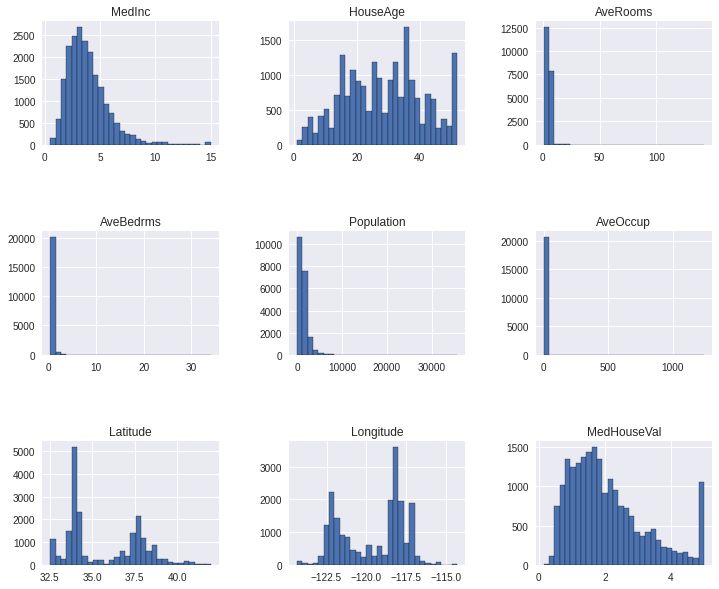

In [ ]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
shuffle_split_cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
features,labels=fetch_california_housing(as_frame=True, return_X_y=True)

In [ ]:
train_features,test_features, train_labels, test_labels=train_test_split(features, labels, random_state=0,shuffle=False)

In [ ]:
lin_reg_pipeline=Pipeline([('feature scaling',StandardScaler()),
                           ("linear reg", LinearRegression())])

In [ ]:
cv_results = cross_validate(lin_reg_pipeline, test_features, test_labels,
                            return_estimator=True,scoring='r2',)

In [ ]:
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} +/- {score.std():.3f}")

R2 score: 0.492 +/- 0.098


In [ ]:
features,labels=fetch_california_housing()

In [ ]:
features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
train_features,test_features, train_labels, test_labels=train_test_split(features, labels, random_state=0,shuffle=False,test_size=0.2)

In [ ]:
train_features.shape

(16512, 8)

In [ ]:
test_features.shape

(4128, 8)

In [ ]:
lin_reg_pipeline=Pipeline([('feature scaling',StandardScaler()),
                           ("linear reg", LinearRegression())])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_features)

StandardScaler()

In [ ]:
print(scaler.transform(train_features))

[[ 2.41761472  0.91662721  0.59834018 ... -0.08812743  1.25839198
  -1.61169516]
 [ 2.40489816 -0.64722457  0.31754578 ... -0.17496218  1.24880693
  -1.60649422]
 [ 1.84707938  1.77674569  1.08917568 ... -0.04006405  1.2440144
  -1.6168961 ]
 ...
 [ 0.20455956 -0.56903198  0.44028947 ...  0.02839487  1.20088167
  -1.02918965]
 [-0.19120325 -1.74192082  0.00823728 ...  0.05403216  1.1865041
  -1.05519436]
 [-0.21348394 -0.56903198  0.30877429 ...  0.05775363  1.20088167
  -1.10200283]]


In [ ]:
train_features=scaler.transform(train_features)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_features, train_labels)

In [ ]:
reg.predict(train_features)

array([4.13990412, 3.99944157, 3.65722325, ..., 1.72775495, 1.41929122,
       1.50058709])

In [ ]:
ypred=reg.predict(test_features)
ypred.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(4128,)

In [ ]:
y=np.array(test_labels)
y

array([1.656, 1.261, 0.944, ..., 0.923, 0.847, 0.894])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, ypred)

-3372.52674431184

In [ ]:
features,labels=fetch_california_housing(return_X_y=True, as_frame=False)
train_features,test_features, train_labels, test_labels=train_test_split(features, labels, random_state=0,shuffle=False,test_size=0.2)


In [ ]:
features.shape

(20640, 8)

In [ ]:
labels.shape

(20640,)

In [ ]:
train_features.shape

(16512, 8)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit_transform(train_features)

In [ ]:
pipeline = Pipeline([
    ("StandardScaler", StandardScaler()),
    ("LinearRegression", LinearRegression())
])


In [ ]:
pipeline.fit(train_features, train_labels)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('LinearRegression', LinearRegression())])

In [ ]:
Y_pred = pipeline.predict(test_features)

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error: ', mean_absolute_error(Y_pred, test_labels))
print('Score', pipeline.score(test_features, test_labels))

Mean Absolute Error:  0.5168526993787044
Score 0.6605140591531986


In [ ]:
r2_score( test_labels,Y_pred)

0.6605140591531986

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_labels,Y_pred)

0.49468483563880844

In [ ]:
x=mean_squared_error(test_labels,Y_pred)**0.5

In [ ]:
x

0.7033383507521884

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_labels,Y_pred)

0.6605500501742696

In [ ]:
from sklearn.metrics import max_error
max_error(test_labels,Y_pred)

7.2604532929585535

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_labels,Y_pred)

0.5168526993787044

In [ ]:
features,labels=fetch_california_housing(return_X_y=True, as_frame=False)
train_features,test_features, train_labels, test_labels=train_test_split(features, labels, random_state=0,shuffle=False,test_size=0.2)

import pandas as pd
import matplotlib.pyplot as plt
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
scaler = StandardScaler()
x_std = scaler.fit_transform(train_features)

pipeline = Pipeline([
    ("StandardScaler", StandardScaler()),
    ('sgdregressor', SGDRegressor())
])
pipeline.fit(train_features, train_labels)

Y_pred = pipeline.predict(test_features)

In [ ]:
Y_pred

array([ 2.84789023,  2.52981937,  2.45449786, ..., -1.03084495,
       -1.52136044,  0.20369797])

In [ ]:
test_labels

array([1.656, 1.261, 0.944, ..., 0.923, 0.847, 0.894])